<br>

# `# Perceptron Trick Coding:`

<br>

In [1]:

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.datasets import make_classification


In [2]:

X,y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
)




In [3]:
X[0],X.shape

(array([ 0.19924745, -0.11697552]), (100, 2))

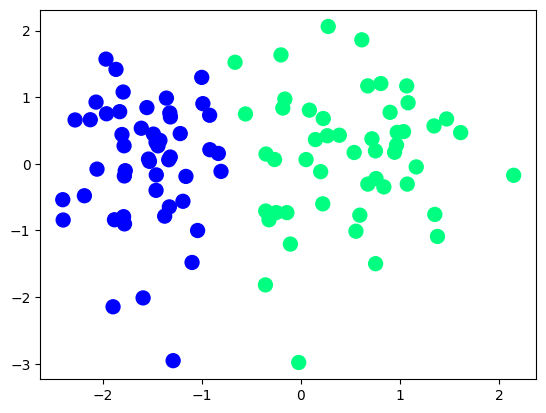

In [4]:

plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter",s=100)

In [5]:
X[0]

array([ 0.19924745, -0.11697552])

In [6]:

## adding one in column: (for the bias term)
temp_x = X
temp_x = np.insert(arr=temp_x,obj=0,values=1,axis=1) 
temp_x[0] 

array([ 1.        ,  0.19924745, -0.11697552])

In [7]:
np.ones(X.shape[1])

array([1., 1.])

In [8]:

def step(x):
    return 1 if x>0 else 0

def perceptron(X,y):
    X = np.insert(arr=X,obj=0,values=1,axis=1)
    weights = np.ones(shape=X.shape[1])
    lr = 0.01
    for i in range(1000):
        j = np.random.randint(0,100) # choose number from (0 to 100) because our total row in 100:
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0], weights[1:] # c,a,b (ax+by+c=0)



In [9]:

intercept_,coefficient = perceptron(X,y)


In [10]:
print(intercept_)
print(coefficient)

0.9299999999999999
[1.29672964 0.26899289]


In [11]:

# find value of m,c, ax+by+c = 0, m = -a/b and c = -C/b
m = -coefficient[0]/coefficient[1]
c = -intercept_/coefficient[1]

print(f"slope: {m}")
print(f"c: {c}")



slope: -4.820683640158742
c: -3.4573404008178183


In [12]:

# we will draw the like for this, we need some value of x
# for the value of x, we need y value to draw the curve:

x_input = np.linspace(start=3,stop=-3,num=100)
y_input = m*x_input + c


(-3.0, 3.0)

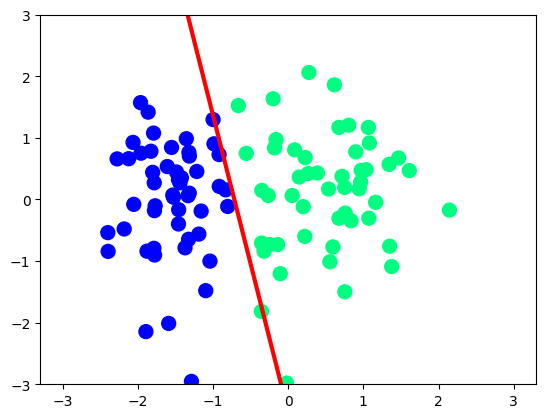

In [13]:

# draw the curve: 

plt.plot(x_input,y_input,c="red",linewidth=3)
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,3) # change range in y. from(15,-20) to (3,-3)

<br>
<br>

# `# using animation visulize the perceptron trick:`

<br>
<br>

In [14]:
# %pip install ipympl

In [15]:
# # Enable interactive plotting
# %matplotlib widget

# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML



# # Perceptron training function
# def perceptron(X, y):
#     m = []
#     b = []
#     X = np.insert(X, 0, 1, axis=1)  
#     weights = np.ones(X.shape[1])  
#     lr = 0.1  
    
#     for i in range(1000):
#         j = np.random.randint(0, 100)  
#         y_hat = step(np.dot(X[j], weights))  
#         weights = weights + lr * (y[j] - y_hat) * X[j]  

#         m.append(-(weights[1] / weights[2]))  
#         b.append(-(weights[0] / weights[2]))  
#     return m, b

# # Train the perceptron and store slope (m) and intercept (b) for each epoch
# m1, b1 = perceptron(X, y)


In [16]:


# fig, ax = plt.subplots(figsize=(9,5))
# x_i = np.linspace(start=3,stop=-3,num=100)

# ax.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter",s=100)
# line1, = ax.plot(x_i, x_i * m1[0] + b1[0],c="red",linewidth=3)
# plt.title("perceptron tranning with animation")

# #update funcation for animation:
# def update(i):
#     label = f'Epoch {i+1}'
#     line1.set_ydata(x_i*m1[i] + b1[i]) # update line data:
#     ax.set_xlabel(label)
#     return line1,ax

# anim = FuncAnimation(fig=fig,func=update,frames=200,interval=100)


<br>
<br>

# same code implemention instead of step funtion we will use sigmoid function: 

<br>
<br>

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Perceptron training function
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)  
    weights = np.ones(X.shape[1])  
    lr = 0.1  
    
    for i in range(1000):
        j = np.random.randint(0, 100)  
        # <------- instead of step function use sigmoid function: ---------> 
        y_hat = sigmoid(np.dot(X[j], weights))  
        weights = weights + lr * (y[j] - y_hat) * X[j]  
    return weights[0],weights[1:]

# Train the perceptron and store slope (m) and intercept (b) for each epoch
intercept1 , coff1 = perceptron(X, y)

In [18]:
m1 = -coff1[0]/coff1[1]
c1 = -intercept1/coff1[1]

(-3.0, 3.0)

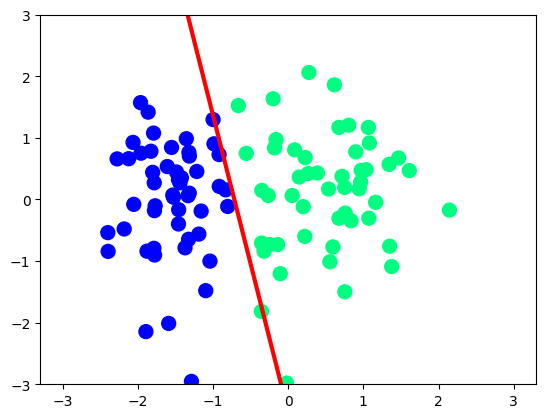

In [19]:


# fig, ax = plt.subplots(figsize=(9,5))
# x_i = np.linspace(start=3,stop=-3,num=100)

# ax.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter",s=100)
# line2, = ax.plot(x_i, x_i * m2[0] + b2[0],c="red",linewidth=3)
# plt.title("perceptron tranning with animation")

# #update funcation for animation:
# def update(i):
#     label = f'Epoch {i+1}'
#     line2.set_ydata(x_i*m2[i] + b2[i]) # update line data:
#     ax.set_xlabel(label)
#     return line2,ax

# anim = FuncAnimation(fig=fig,func=update,frames=200,interval=100)

x_input1 = np.linspace(-3,3,100)
y_input1 = x_input1*m1 + c1

plt.plot(x_input,y_input,c="red",linewidth=3)
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,3) # change range in y. from(15,-20) to (3,-3)



<br>
<br>


# `Use logistics regression from sklearn:`

<br>
<br>

In [20]:

from sklearn.linear_model import LogisticRegression
logisticR = LogisticRegression()
logisticR.fit(X,y)


LogisticRegression()

In [21]:


m3 = -(logisticR.coef_[0][0]/logisticR.coef_[0][1])
b3 = -(logisticR.intercept_/logisticR.coef_[0][1])
m3,b3

(np.float64(-126.24706352310278), array([-81.16386951]))

In [22]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m3*x_input2 + b3

<br>
<br>

# `Draw and compare: using step,sigoid,and logistics regresstion in sklearn:`

<br>
<br>

(-3.0, 2.0)

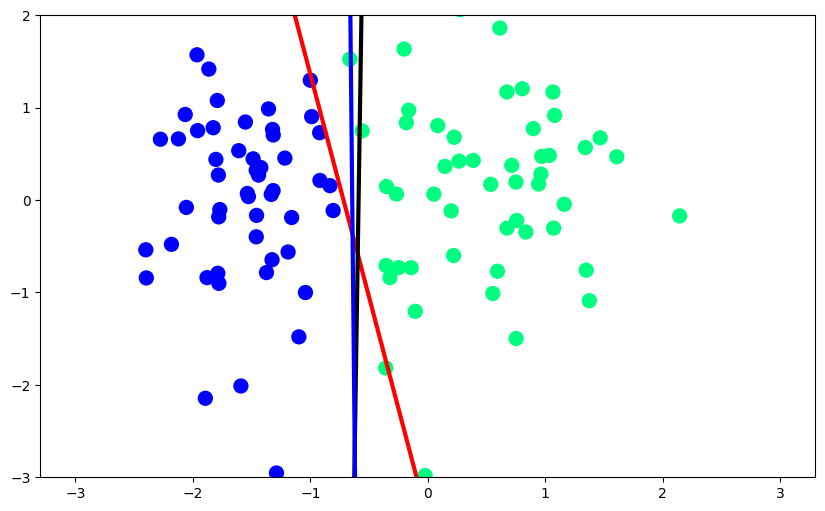

In [25]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3) # using step function
plt.plot(x_input1,y_input1,color='black',linewidth=3) # using sigmoid function
plt.plot(x_input2,y_input2,color='blue',linewidth=3) # using logistics regression
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
